In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from tabulate import tabulate

## Segmentation Method Comparison
Metrics: IoU(Intersection over Union), F1 score, false positive rate averaged on video frames

In [2]:
seg_results = pd.read_csv(os.path.join(os.getcwd(), "seg_comparison.csv"))
seg_results.head()

,seg method,data type,object name,IoU,F1,FP rate
0,BackFlow,Data,YcbMustardBottle,0.907731,0.931602,0.076235
1,BackFlow,Data,YcbGelatinBox,0.883326,0.934864,0.115640
2,BackFlow,Data,YcbPottedMeatCan,0.898410,0.945141,0.097698
3,BackFlow,Data,YcbTomatoSoupCan,0.871855,0.929788,0.124419
4,BackFlow,Data,YcbCrackerBox,0.961743,0.978536,0.032422


In [3]:
seg_results.tail()

,seg method,data type,object name,IoU,F1,FP rate
27,OSVOS,Data_stuck,YcbTomatoSoupCan,0.899331,0.946114,0.071509
28,OSVOS,Data_stuck,YcbCrackerBox,0.980633,0.990175,0.015067
29,OSVOS,Data_stuck,YcbSugarBox,0.905609,0.948766,0.048143
30,OSVOS,Data_stuck,YcbBanana,0.924367,0.960452,0.074216
31,OSVOS,Data_stuck,YcbTennisBall,0.886893,0.939427,0.111143


In [4]:
seg_method = seg_results['seg method'].unique()
table = []
for s in seg_method:
    table.append([str(s), np.mean(seg_results.loc[seg_results['seg method'] == s]['IoU']),
                 np.mean(seg_results.loc[seg_results['seg method'] == s]['F1']),
                 np.mean(seg_results.loc[seg_results['seg method'] == s]['FP rate'])])
print(tabulate(table, headers=['seg method', 'mIoU','F1','FP rate']))

seg method        mIoU        F1    FP rate
------------  --------  --------  ---------
BackFlow      0.896087  0.939715  0.0879889
OSVOS         0.909781  0.950612  0.0719721


OSVOS performs better than BackFlow on three different metrics.
Note that: FP rate is relatively more important for reconstruction, because it's worse if the background is involved in reconstructed model.

<AxesSubplot:xlabel='seg method', ylabel='IoU'>

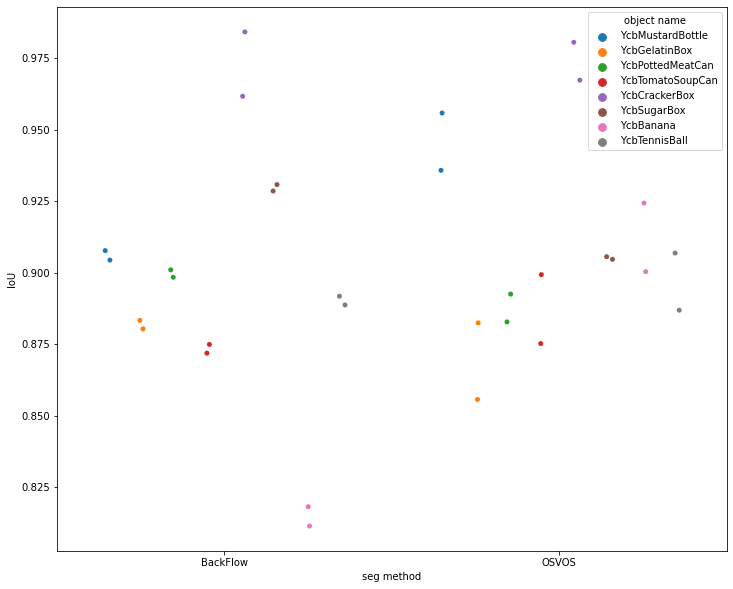

In [5]:
sns.set_context({"figure.figsize":(12,10)})
sns.stripplot(x="seg method",y="IoU",data=seg_results,jitter=True,hue="object name", dodge=True) 

BackFlow works not so well on 'YcbBanana'.

# Reconstruction Algorithm Comparison
Metrics: mean usdf(unsigned distance fields) averaged on points in point-cloud, mean and RMS hausdorff distance( calculated bi-directionally)

In [6]:
recon_results = pd.read_csv(os.path.join(os.getcwd(), "recon_comparison.csv"))
recon_results.head()

,Data Path,Object Name,Segmentation Method,Reconstruction Method,mean usdf,mean sdf,mean squared sdf,mean haus dist,min haus dist,max haus dist,RMS haus dist
0,Data,YcbMustardBottle,BackFlow,point-to-plane,0.005118,0.004831,0.002085,0.000447,0.000018,0.006136,0.000554
1,Data,YcbMustardBottle,BackFlow,robot-joints,0.003591,-0.000722,0.000038,0.001659,0.000002,0.011219,0.002553
2,Data,YcbMustardBottle,OSVOS,point-to-plane,0.000976,0.000704,0.000033,0.000699,0.000016,0.006298,0.000795
3,Data,YcbMustardBottle,OSVOS,robot-joints,0.002858,-0.001444,0.000017,0.001653,0.000002,0.011219,0.002551
4,Data_stuck,YcbMustardBottle,BackFlow,point-to-plane,0.004801,0.004575,0.001804,0.000440,0.000015,0.004941,0.000565


In [7]:
recon_results.tail()

,Data Path,Object Name,Segmentation Method,Reconstruction Method,mean usdf,mean sdf,mean squared sdf,mean haus dist,min haus dist,max haus dist,RMS haus dist
59,Data,YcbTennisBall,OSVOS,robot-joints,0.002057,-0.000395,0.000020,0.000917,0.000008,0.005071,0.001148
60,Data_stuck,YcbTennisBall,BackFlow,point-to-plane,0.454618,0.454606,0.272326,0.003165,0.000022,0.022919,0.005867
61,Data_stuck,YcbTennisBall,BackFlow,robot-joints,0.001534,0.001095,0.000025,0.000450,0.000011,0.006698,0.000669
62,Data_stuck,YcbTennisBall,OSVOS,point-to-plane,0.015826,0.015702,0.013439,0.002624,0.000017,0.024916,0.005066
63,Data_stuck,YcbTennisBall,OSVOS,robot-joints,0.001028,0.000571,0.000044,0.000464,0.000014,0.006669,0.000713


### 'Data Path' 
    'Data': generated by grasping the object.
    'Data_stuck': generated by resetting the object with the gripper and protecting from sliding.
### 'Reconstruction Method'
    'point-to-plane': reconstructed with point-to-plane icp.
    'robot-joints': reconstructed with robot end effector positions and orientations, e.g. center of two prismatic fingers for franka

## General performance of point-to-plane icp and robot-joints

In [8]:
def evaluate(data, type= 'Reconstruction Method'):
    method = recon_results[type].unique()
    table = []
    for m in method:
        table.append([str(m), np.mean(data.loc[data[type] == m]['mean usdf']),
                     np.mean(data.loc[data[type] == m]['mean haus dist']),
                     np.mean(data.loc[data[type] == m]['RMS haus dist'])])
    print(tabulate(table, headers=[type, 'mean usdf','mean haus dist','RMS haus dist']))

In [9]:
print("general performance")
evaluate(recon_results)

general performance
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.327332         0.00190181        0.00286709
robot-joints              0.00247028       0.000988605       0.00151556


## Performance on 'Data' or 'Data_stuck'

In [10]:
print("Performance on 'Data'")
evaluate(recon_results.loc[recon_results['Data Path'] == 'Data'])

Performance on 'Data'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.622899          0.00269078       0.0038156
robot-joints              0.00367258        0.0014477        0.00212866


In [11]:
print("Performance on 'Data_stuck'")
evaluate(recon_results.loc[recon_results['Data Path'] == 'Data_stuck'])

Performance on 'Data_stuck'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.0317661        0.00111285       0.00191859
robot-joints              0.00126798       0.000529508      0.000902459


<AxesSubplot:xlabel='Reconstruction Method', ylabel='mean usdf'>

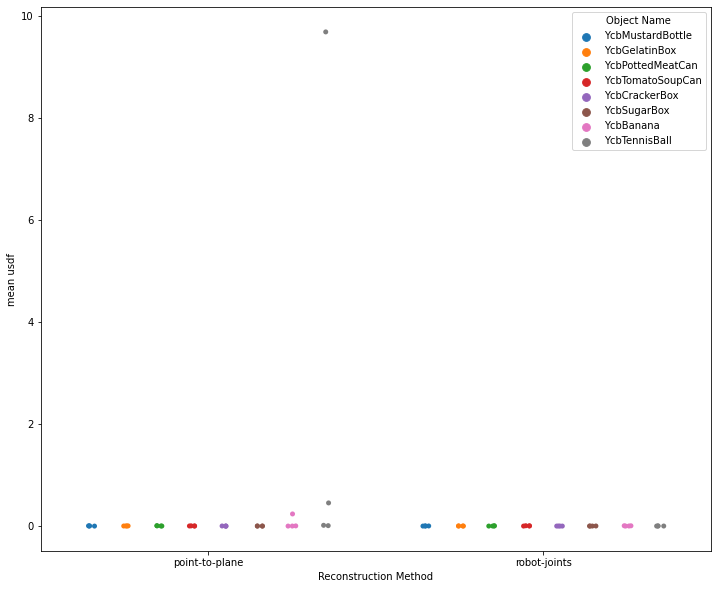

In [12]:
sns.set_context({"figure.figsize":(12,10)})
sns.stripplot(x="Reconstruction Method",y="mean usdf",data=recon_results,jitter=True,hue="Object Name", dodge=True) 

Point-to-plane work extremely bad on YcbTennisBall. So the general performance of point-to-plane looks much worse than robot-joints.\
If YcbTennisBall is kicked out:

In [13]:
recon_results_drop = recon_results[recon_results['Object Name']!='YcbTennisBall']

<AxesSubplot:xlabel='Reconstruction Method', ylabel='mean usdf'>

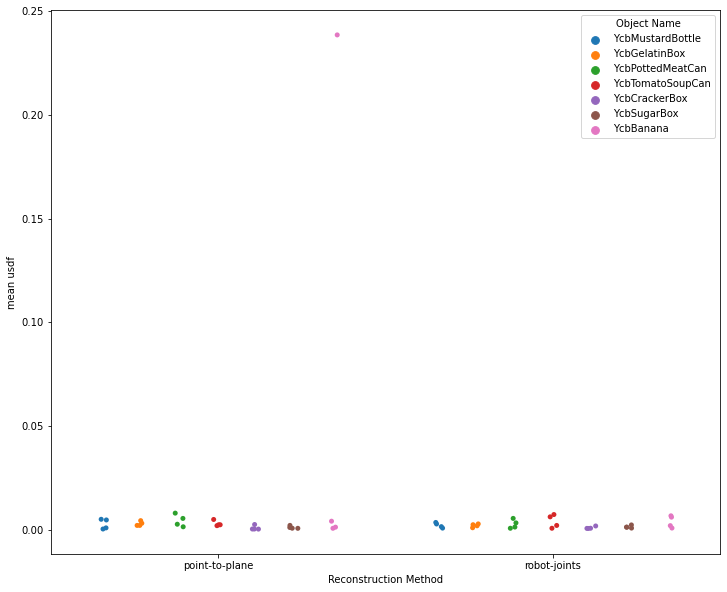

In [14]:
sns.set_context({"figure.figsize":(12,10)})
sns.stripplot(x="Reconstruction Method",y="mean usdf",data=recon_results_drop,jitter=True,hue="Object Name", dodge=True) 

In [15]:
print("general")
evaluate(recon_results_drop)
print("\n'Data'")
evaluate(recon_results_drop.loc[recon_results_drop['Data Path'] == 'Data'])
print("\n'Data_stuck'")
evaluate(recon_results_drop.loc[recon_results_drop['Data Path'] == 'Data_stuck'])

general
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.0109608         0.00183893       0.00267426
robot-joints              0.00253711        0.00103155       0.00160034

'Data'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.0192207         0.00281954       0.0039368
robot-joints              0.00380814        0.0015232        0.00226799

'Data_stuck'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.00270094       0.00085832        0.00141172
robot-joints              0.00126607       0.000539897       0.00093268


drop YcbBanana

In [16]:
recon_results_drop2 = recon_results[recon_results['Object Name']!='YcbTennisBall'][recon_results['Object Name']!='YcbBanana']

/tmp/ipykernel_43317/2632672501.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recon_results_drop2 = recon_results[recon_results['Object Name']!='YcbTennisBall'][recon_results['Object Name']!='YcbBanana']


<AxesSubplot:xlabel='Reconstruction Method', ylabel='mean usdf'>

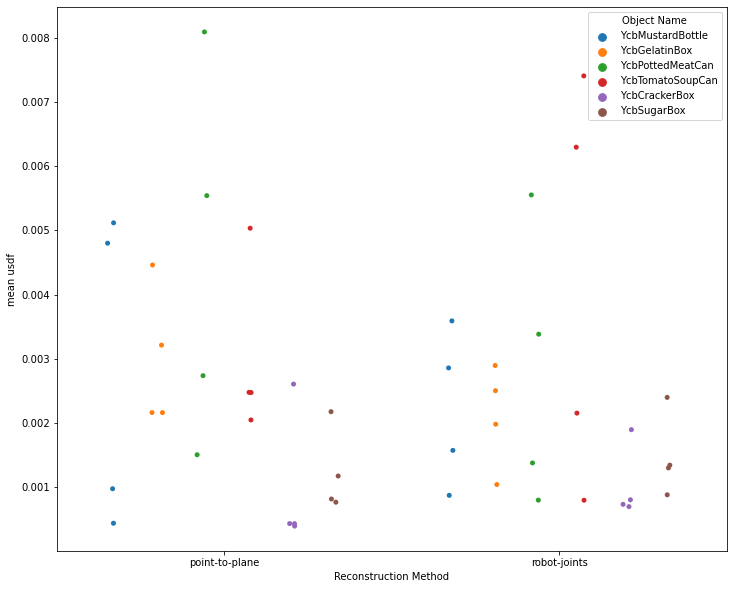

In [17]:
sns.set_context({"figure.figsize":(12,10)})
sns.stripplot(x="Reconstruction Method",y="mean usdf",data=recon_results_drop2,jitter=True,hue="Object Name", dodge=True) 

In [18]:
print("general")
evaluate(recon_results_drop2)
print("\n'Data'")
evaluate(recon_results_drop2.loc[recon_results_drop2['Data Path'] == 'Data'])
print("\n'Data_stuck'")
evaluate(recon_results_drop2.loc[recon_results_drop2['Data Path'] == 'Data_stuck'])

general
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.00258523       0.000907076       0.00145407
robot-joints              0.00229762       0.00100571        0.00158859

'Data'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.00243453       0.000909623        0.0014017
robot-joints              0.00336379       0.00145612         0.0021993

'Data_stuck'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.00273594       0.000904529      0.00150643
robot-joints              0.00123146       0.000555293      0.000977875


Brief conclusion:\
If reconstruction methods are performed on the object with significant features, point-to-plane ICP and robot-ee-info have the similar reconstruction performances generally.\
In detail, point-to-plane works better than robot-ee-info on the dataset generated by directly grasping('Data'), and it's opposite for the dataset generated by resetting the object within the gripper('Data_stuck').

## Segmented by BackFlow or by OSVOS

In [19]:
print("all objects")
evaluate(recon_results, type= 'Segmentation Method')
print("\ndrop tennis ball")
evaluate(recon_results_drop, type= 'Segmentation Method')
print("\ndrop banana")
evaluate(recon_results_drop2, type= 'Segmentation Method')

all objects
Segmentation Method      mean usdf    mean haus dist    RMS haus dist
---------------------  -----------  ----------------  ---------------
BackFlow                 0.326978         0.00175713       0.00256824
OSVOS                    0.0028245        0.00113329       0.00181441

drop tennis ball
Segmentation Method      mean usdf    mean haus dist    RMS haus dist
---------------------  -----------  ----------------  ---------------
BackFlow                0.0112672         0.00181425       0.00261059
OSVOS                   0.00223075        0.00105622       0.00166401

drop banana
Segmentation Method      mean usdf    mean haus dist    RMS haus dist
---------------------  -----------  ----------------  ---------------
BackFlow                0.0026617        0.000823804       0.00130877
OSVOS                   0.00222116       0.00108898        0.00173389


Brief conclusion:\
Segmentation Method influences the reconstruction performance. Generally, reconstruction following BackFlow has much worse performance than that following OSVOS.

### BackFlow

In [20]:
recon_results_backflow = recon_results_drop2[recon_results_drop2['Segmentation Method'] == 'BackFlow']

<AxesSubplot:xlabel='Reconstruction Method', ylabel='mean usdf'>

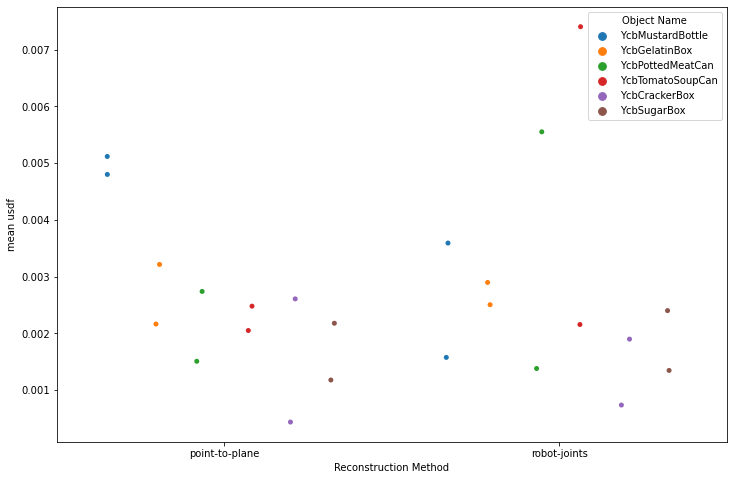

In [21]:
sns.set_context({"figure.figsize":(12,8)})
sns.stripplot(x="Reconstruction Method",y="mean usdf",data=recon_results_backflow,jitter=True,hue="Object Name", dodge=True) 

In [22]:
print("general")
evaluate(recon_results_backflow)
print("\n'Data'")
evaluate(recon_results_backflow.loc[recon_results_backflow['Data Path'] == 'Data'])
print("\n'Data_stuck'")
evaluate(recon_results_backflow.loc[recon_results_backflow['Data Path'] == 'Data_stuck'])

general
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.00253778       0.000649172       0.00103541
robot-joints              0.00278561       0.000998437       0.00158212

'Data'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane             0.0028079       0.000701502       0.00108705
robot-joints               0.0039568       0.00144841        0.0021999

'Data_stuck'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.00226766       0.000596841      0.000983779
robot-joints              0.00161442       0.000548466      0.000964341


### OSVOS

In [23]:
recon_results_osvos = recon_results_drop2[recon_results_drop2['Segmentation Method'] == 'OSVOS']

<AxesSubplot:xlabel='Reconstruction Method', ylabel='mean usdf'>

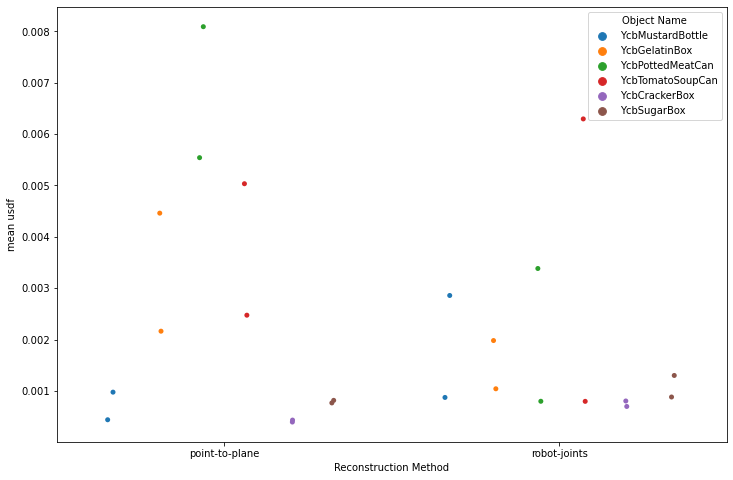

In [24]:
sns.set_context({"figure.figsize":(12,8)})
sns.stripplot(x="Reconstruction Method",y="mean usdf",data=recon_results_osvos,jitter=True,hue="Object Name", dodge=True) 

In [25]:
print("general")
evaluate(recon_results_osvos)
print("\n'Data'")
evaluate(recon_results_osvos.loc[recon_results_osvos['Data Path'] == 'Data'])
print("\n'Data_stuck'")
evaluate(recon_results_osvos.loc[recon_results_osvos['Data Path'] == 'Data_stuck'])

general
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.00263268        0.00116498       0.00187272
robot-joints              0.00180964        0.00101298       0.00159506

'Data'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane            0.00206115        0.00111774       0.00171636
robot-joints              0.00277078        0.00146383       0.0021987

'Data_stuck'
Reconstruction Method      mean usdf    mean haus dist    RMS haus dist
-----------------------  -----------  ----------------  ---------------
point-to-plane           0.00320421         0.00121222      0.00202908
robot-joints             0.000848496        0.00056212      0.000991409


Brief conclusion:\
If reconstruction methods are performed on the object with significant features, point-to-plane ICP and robot-ee-info have the similar reconstruction performances when reconstruction is performed after BackFlow segmentation, and for OSVOS, robot-joints performs better. And the conclusions for 'Data' and 'Data_stuck' remain the same.